In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
dataFrame = pd.read_excel("maliciousornot.xlsx")

In [3]:
dataFrame.head()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456


In [4]:
dataFrame.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

<AxesSubplot:xlabel='Type', ylabel='count'>

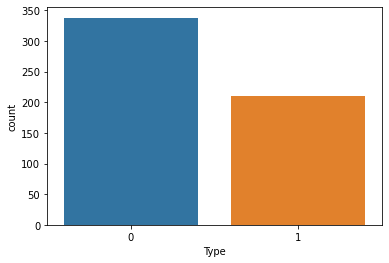

In [5]:
sbn.countplot(x = "Type",data = dataFrame)

<AxesSubplot:>

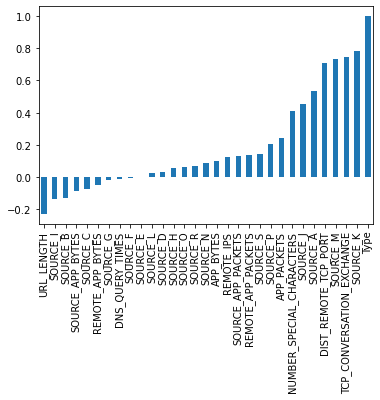

In [6]:
dataFrame.corr()["Type"].sort_values().plot(kind = "bar")

In [7]:
y = dataFrame["Type"].values
x = dataFrame.drop("Type",axis = 1).values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 15)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
x_train.shape

(383, 30)

In [15]:
model = Sequential()

In [16]:
model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy" , optimizer = "adam")

In [17]:
model.fit(x = x_train, y = y_train ,epochs = 700, validation_data = (x_test,y_test),verbose = 1)

Epoch 1/700
12/12 [==============================] - 1s 33ms/step - loss: 0.6985 - val_loss: 0.6787
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6734 - val_loss: 0.6634
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6507 - val_loss: 0.6405
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6220 - val_loss: 0.6079
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5875 - val_loss: 0.5734
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5437 - val_loss: 0.5248
Epoch 7/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4922 - val_loss: 0.4737
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4353 - val_loss: 0.4181
Epoch 9/700
12/12 [==============================] - 0s 5ms/step - loss: 0.3757 - val_loss: 0.3713
Epoch 10/700
12/12 [==============================] - 0s 4ms/step - loss: 0.3208 - val_loss: 0.3244
Epoch 11

12/12 [==============================] - 0s 5ms/step - loss: 0.0474 - val_loss: 0.2589
Epoch 84/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0483 - val_loss: 0.2321
Epoch 85/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0485 - val_loss: 0.2430
Epoch 86/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0464 - val_loss: 0.2580
Epoch 87/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0465 - val_loss: 0.2552
Epoch 88/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0453 - val_loss: 0.2332
Epoch 89/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0455 - val_loss: 0.2736
Epoch 90/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0448 - val_loss: 0.2548
Epoch 91/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0440 - val_loss: 0.2676
Epoch 92/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0472 - val_loss: 0.2387
Epoch 93/700


12/12 [==============================] - 0s 5ms/step - loss: 0.0275 - val_loss: 0.3702
Epoch 165/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0336 - val_loss: 0.3120
Epoch 166/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0371 - val_loss: 0.4199
Epoch 167/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0275 - val_loss: 0.3727
Epoch 168/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0272 - val_loss: 0.3426
Epoch 169/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0248 - val_loss: 0.4225
Epoch 170/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0298 - val_loss: 0.3244
Epoch 171/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0314 - val_loss: 0.4140
Epoch 172/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0275 - val_loss: 0.3902
Epoch 173/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0273 - val_loss: 0.3852
Epoc

12/12 [==============================] - 0s 5ms/step - loss: 0.0179 - val_loss: 0.4608
Epoch 246/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0168 - val_loss: 0.5293
Epoch 247/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0141 - val_loss: 0.4351
Epoch 248/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0153 - val_loss: 0.4976
Epoch 249/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0147 - val_loss: 0.5022
Epoch 250/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.5109
Epoch 251/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0147 - val_loss: 0.4765
Epoch 252/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.4680
Epoch 253/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.5174
Epoch 254/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0155 - val_loss: 0.5209
Epoc

12/12 [==============================] - 0s 5ms/step - loss: 0.0096 - val_loss: 0.5320
Epoch 327/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.5841
Epoch 328/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.5910
Epoch 329/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.5481
Epoch 330/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.6100
Epoch 331/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.5296
Epoch 332/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.5826
Epoch 333/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0082 - val_loss: 0.6110
Epoch 334/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.6115
Epoch 335/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.4962
Epoc

12/12 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.6945
Epoch 408/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.6893
Epoch 409/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.7400
Epoch 410/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.6571
Epoch 411/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.8355
Epoch 412/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.6882
Epoch 413/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.7445
Epoch 414/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.7214
Epoch 415/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.7550
Epoch 416/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.7007
Epoc

12/12 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.9113
Epoch 489/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.9055
Epoch 490/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.9163
Epoch 491/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.8159
Epoch 492/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 1.0000
Epoch 493/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.9087
Epoch 494/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.9099
Epoch 495/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.8545
Epoch 496/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.8692
Epoch 497/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.8834
Epoc

12/12 [==============================] - 0s 5ms/step - loss: 7.9214e-04 - val_loss: 0.9825
Epoch 569/700
12/12 [==============================] - 0s 5ms/step - loss: 7.2586e-04 - val_loss: 1.0044
Epoch 570/700
12/12 [==============================] - 0s 5ms/step - loss: 6.9651e-04 - val_loss: 0.9701
Epoch 571/700
12/12 [==============================] - 0s 5ms/step - loss: 6.5084e-04 - val_loss: 1.0001
Epoch 572/700
12/12 [==============================] - 0s 5ms/step - loss: 6.4167e-04 - val_loss: 1.0100
Epoch 573/700
12/12 [==============================] - 0s 5ms/step - loss: 6.2924e-04 - val_loss: 1.0009
Epoch 574/700
12/12 [==============================] - 0s 5ms/step - loss: 8.3578e-04 - val_loss: 0.9405
Epoch 575/700
12/12 [==============================] - 0s 4ms/step - loss: 8.2679e-04 - val_loss: 1.0173
Epoch 576/700
12/12 [==============================] - 0s 5ms/step - loss: 8.1952e-04 - val_loss: 0.9767
Epoch 577/700
12/12 [==============================] - 0s 5ms/step - 

12/12 [==============================] - 0s 6ms/step - loss: 3.0978e-04 - val_loss: 1.0551
Epoch 647/700
12/12 [==============================] - 0s 5ms/step - loss: 3.0828e-04 - val_loss: 1.0400
Epoch 648/700
12/12 [==============================] - 0s 5ms/step - loss: 2.6876e-04 - val_loss: 1.0438
Epoch 649/700
12/12 [==============================] - 0s 10ms/step - loss: 2.9150e-04 - val_loss: 1.0719
Epoch 650/700
12/12 [==============================] - 0s 5ms/step - loss: 2.8213e-04 - val_loss: 1.0412
Epoch 651/700
12/12 [==============================] - 0s 5ms/step - loss: 3.2227e-04 - val_loss: 1.0942
Epoch 652/700
12/12 [==============================] - 0s 5ms/step - loss: 3.0418e-04 - val_loss: 1.0491
Epoch 653/700
12/12 [==============================] - 0s 5ms/step - loss: 2.8821e-04 - val_loss: 1.0537
Epoch 654/700
12/12 [==============================] - 0s 5ms/step - loss: 2.5490e-04 - val_loss: 1.0615
Epoch 655/700
12/12 [==============================] - 0s 5ms/step -

In [18]:
model.history.history

{'loss': [0.6985243558883667,
  0.6734094023704529,
  0.650741457939148,
  0.6220113635063171,
  0.5875403881072998,
  0.5437417030334473,
  0.49215683341026306,
  0.43534910678863525,
  0.375704288482666,
  0.32079753279685974,
  0.2762315571308136,
  0.2382543534040451,
  0.21264392137527466,
  0.18823248147964478,
  0.17075742781162262,
  0.15862402319908142,
  0.14724215865135193,
  0.13854318857192993,
  0.13242961466312408,
  0.12655676901340485,
  0.12133310735225677,
  0.11613434553146362,
  0.11030110716819763,
  0.1074734553694725,
  0.10425819456577301,
  0.1012776792049408,
  0.0978420227766037,
  0.09859725832939148,
  0.09910523891448975,
  0.0944361686706543,
  0.09108048677444458,
  0.08742591738700867,
  0.08564672619104385,
  0.08256746083498001,
  0.08259045332670212,
  0.0795540064573288,
  0.07741249352693558,
  0.07791215926408768,
  0.07532136887311935,
  0.07440560311079025,
  0.07333076000213623,
  0.07283948361873627,
  0.07136029005050659,
  0.071205288171768

In [19]:
modelKaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

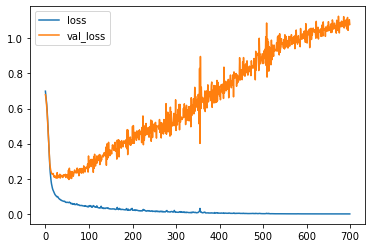

In [20]:
modelKaybi.plot()

In [21]:
model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy" , optimizer = "adam")

In [22]:
earlyStopping = EarlyStopping(monitor = "val_loss",mode = "min",verbose = 1, patience = 25)

In [23]:
model.fit(x = x_train, y = y_train ,epochs = 700, validation_data = (x_test,y_test),verbose = 1,callbacks = [earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 21ms/step - loss: 0.6996 - val_loss: 0.6933
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6837 - val_loss: 0.6880
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6769 - val_loss: 0.6870
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6697 - val_loss: 0.6820
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6542 - val_loss: 0.6619
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6161 - val_loss: 0.6350
Epoch 7/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5797 - val_loss: 0.6088
Epoch 8/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5390 - val_loss: 0.5795
Epoch 9/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4954 - val_loss: 0.5489
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4482 - val_loss: 0.5146
Epoch 11

In [24]:
modelKaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

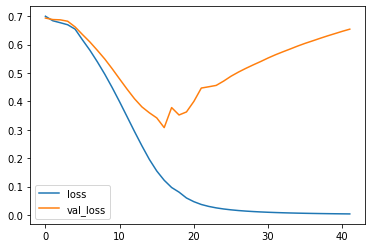

In [25]:
modelKaybi.plot()

In [26]:
model.add(Dense(units = 30, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy" , optimizer = "adam")

In [27]:
model.fit(x=x_train, y=y_train, epochs = 700, validation_data = (x_test,y_test), verbose = 1, callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 25ms/step - loss: 0.6887 - val_loss: 0.6823
Epoch 2/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6709 - val_loss: 0.6652
Epoch 3/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6545 - val_loss: 0.6446
Epoch 4/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6405 - val_loss: 0.6288
Epoch 5/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6214 - val_loss: 0.6135
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5935 - val_loss: 0.5953
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5686 - val_loss: 0.5845
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5488 - val_loss: 0.5386
Epoch 9/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4994 - val_loss: 0.5345
Epoch 10/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4830 - val_loss: 0.5081
Epoch 11

In [31]:
kayipDf = pd.DataFrame(model.history.history)

<AxesSubplot:>

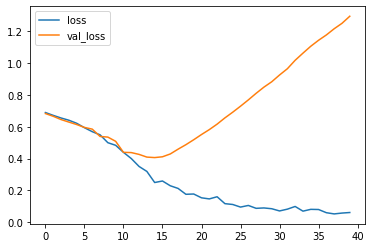

In [32]:
kayipDf.plot()

In [38]:
tahminlerimiz = (model.predict(x_test) > 0.5).astype("int32")

In [39]:
tahminlerimiz

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test,tahminlerimiz))

              precision    recall  f1-score   support

           0       0.99      0.77      0.86        91
           1       0.78      0.99      0.87        74

    accuracy                           0.87       165
   macro avg       0.88      0.88      0.87       165
weighted avg       0.89      0.87      0.87       165



In [42]:
print(confusion_matrix(y_test,tahminlerimiz))

[[70 21]
 [ 1 73]]
